In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


## PART 3: FEATURE ENGINEERING & FEATURE SELECTION

In this part of the project we are going to make some transformation to our categorical variables and adapt them to fit the model

In [3]:
#Select categorical columns
cat_columns = df.select_dtypes(include='object')
cat_columns.describe()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


Column 'Loan Title' can be heavily reduced. We have repeated terms like 'Debt Consolidation' that have different entries in upper or lowercases or in reduced form. 

In [4]:
# Create a mapping of categories to titles
category_mapping = {
    'Debt Loans/Consolidation/Payoff': [
        'Debt Loan', 'Debt Consolidation', 'DEBT CONSOLIDATION', 'Debt Consolidation Loan', 'Dept consolidation', 
        'consolidation loan', 'Dept consolidation', 'CONSOLIDATE', 'CONSOLIDATION', 'CC Consolidation', 
        'Debt Consolidation 2013', 'consolidation', 'Debt payoff', 'Loan Consolidation', 'conso', 'Loan Consolidation', 
        'debt consolidation loan', 'Consolidation', 'consolidate', 'Consolidate', 'Consolidated', 'Refinance Loan', 
        'Payoff', 'Debt Payoff', 'Pay Off'
    ],
    'Credit Card': [
        'Credit card refinancing', 'credit card consolidation', 'Credit Card Refi', 'credit card', 'Credit Card Consolidation', 
        'Credit Card Loan', 'Credit Card Debt', 'Credit card refinance', 'Credit Card consolidation', 'Credit Card Paydown', 
        'Credit card pay off', 'credit card refinance', 'credit card refinance', 'Credit Card Refinance Loan', 'CC Loan', 
        'Credit Consolidation', 'Credit Cards', 'Card Consolidation', 'CC', 'credit pay off', 'Credit payoff', 'Credit'
    ],
    'Home Improvement': [
        'Home improvement', 'Home Improvement', 'home improvement', 'Home buying', 'Bathroom', 'House', 'Home', 
        'Home Improvement Loan', 'Home loan', 'bills', 'Home Improvement Loan', 'Bill Consolidation', 'pay off bills'
    ],
    'Medical Expenses': [
        'Medical expenses', 'Medical', 'Medical loan'
    ],
    'Vacation': [
        'Vacation', 'vacation'
    ],
    'Business': [
        'Business', 'Lending Club'
    ],
    'Personal Loan': [
        'Personal Loan', 'Personal', 'Personal loan', 'personal', 'MYLOAN', 'Wedding Loan', 'My Loan', 'Loan'
    ],
    'Car Financing': [
        'Car financing', 'Car Loan'
    ],
    'Other': [
        'Green loan', 'Other', 'Moving and relocation', 'Major purchase', 'Get Debt Free', 'Pool', 'Debt Free', 
        'Loan 1', 'get out of debt', 'Getting Ahead', 'relief', 'loan1'
    ]
}

# Create a new column "Category" based on the mapping that reduced the number of categories
for category, titles in category_mapping.items():
    df.loc[df['Loan Title'].isin(titles), 'Category'] = category


In [5]:
cat_columns = df.select_dtypes(include='object')
cat_columns.describe()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type,Category
count,67463,67463,67463,67463,67463,67463,67463,67463,67463,41971
unique,41,7,35,3,3,1,109,2,2,9
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL,Credit Card
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340,31123


In [6]:
#We can now delete the previous column
df = df.drop(columns=['Loan Title'])

In [7]:
cat_columns = df.select_dtypes(include='object')
cat_columns.describe()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Initial List Status,Application Type,Category
count,67463,67463,67463,67463,67463,67463,67463,67463,41971
unique,41,7,35,3,3,1,2,2,9
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,w,INDIVIDUAL,Credit Card
freq,3626,19085,4462,36351,33036,67463,36299,67340,31123


In [8]:
df.shape

(67463, 35)

In [9]:
df['Payment Plan'].value_counts()

n    67463
Name: Payment Plan, dtype: int64

In [10]:
df['Accounts Delinquent'].value_counts()

0    67463
Name: Accounts Delinquent, dtype: int64

In [11]:
df['Accounts Delinquent']

0        0
1        0
2        0
3        0
4        0
        ..
67458    0
67459    0
67460    0
67461    0
67462    0
Name: Accounts Delinquent, Length: 67463, dtype: int64

In [12]:
df['Initial List Status']

0        w
1        f
2        w
3        w
4        w
        ..
67458    w
67459    w
67460    w
67461    f
67462    f
Name: Initial List Status, Length: 67463, dtype: object

We can drop 2 columns: payment plan and accounts delinquent. In the first one there is only one value and in the second one
we have no values

In [13]:
df = df.drop(columns=['Payment Plan','Accounts Delinquent' ])
df.shape

(67463, 33)

- Now we move to transform the categorical columns into numeric.
- Grade and sub-grade are ordinal variables so we can convert them through ordinal encoding(A->1, B->2, C ->3...)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_columns = ["Grade", "Sub Grade"]
grade_order = ["A", "B", "C", "D", "E", "F", "G"]
sub_grade_order = [
    "A1", "A2", "A3", "A4", "A5",
    "B1", "B2", "B3", "B4", "B5",
    "C1", "C2", "C3", "C4", "C5",
    "D1", "D2", "D3", "D4", "D5",
    "E1", "E2", "E3", "E4", "E5",
    "F1", "F2", "F3", "F4", "F5",
    "G1", "G2", "G3", "G4", "G5"
]
encoder = OrdinalEncoder(categories=[grade_order, sub_grade_order])
df[ordinal_columns] = encoder.fit_transform(df[ordinal_columns])

In [15]:
cat_columns = df.select_dtypes(include='object')
cat_columns.describe()

,Batch Enrolled,Employment Duration,Verification Status,Initial List Status,Application Type,Category
count,67463,67463,67463,67463,67463,41971
unique,41,3,3,2,2,9
top,BAT3873588,MORTGAGE,Source Verified,w,INDIVIDUAL,Credit Card
freq,3626,36351,33036,36299,67340,31123


For the column 'Batch Enrolled' I am going to use frequency based encoding. This is a technique that assings a number to each unique
value of the column based on the frequency. This is a technique I have never used and I want to give it a try.
I think it is a good fit here because if we use one hot encoding, we will add 41 new columns and this new columns
could derive in multicollinearity and overfitting. I will also run the project using one hot encoding and then reduce the data dimensionality


In [16]:
# Create a dictionary mapping unique values to their frequencies
frequency_map = df['Batch Enrolled'].value_counts().to_dict()

# Replace values with their corresponding frequencies
df['Batch Enrolled'] = df['Batch Enrolled'].map(frequency_map)

In [17]:
df['Batch Enrolled'].describe()

count    67463.000000
mean      1955.365208
std        735.070671
min        296.000000
25%       1421.000000
50%       1844.000000
75%       2403.000000
max       3626.000000
Name: Batch Enrolled, dtype: float64

- We have 'Batch Enrolled' transfomed using frequency based encoding
- We not use One Hot Encode to transform the rest of categorical columns

In [18]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ["Employment Duration", "Verification Status", "Initial List Status", "Application Type", "Category"]
df = pd.get_dummies(df, columns=categorical_columns)

In [19]:
#Columns we are working with
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Home Ownership', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Total Received Interest', 'Total Received Late Fee', 'Recoveries',
       'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status',
       'Employment Duration_MORTGAGE', 'Employment Duration_OWN',
       'Employment Duration_RENT', 'Verification Status_Not Verified',
       'Verification Status_Source Verified', 'Verification Status_Verified',
       'Initial List Status_f', 'Initial List Status_w',
       'Application Type_INDIVIDUAL', 'Application Type_JOINT',
       'Category_Business', 'Category_Car Fin

In [20]:
#Now we have all the columns into numerical values
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Application Type_JOINT,Category_Business,Category_Car Financing,Category_Credit Card,Category_Debt Loans/Consolidation/Payoff,Category_Home Improvement,Category_Medical Expenses,Category_Other,Category_Personal Loan,Category_Vacation
0,65087372,10000,32236,12329.36286,59,1399,11.135007,1.0,13.0,176346.62670,...,0,0,0,0,1,0,0,0,0,0
1,1450153,3609,11940,12191.99692,59,3142,12.237563,2.0,17.0,39833.92100,...,0,0,0,0,0,0,0,0,0,0
2,1969101,28276,9311,21603.22455,59,1790,12.545884,5.0,18.0,91506.69105,...,0,0,0,0,1,0,0,0,0,0
3,6651430,11170,6954,17877.15585,59,1398,16.731201,2.0,12.0,108286.57590,...,0,0,0,0,0,0,0,0,0,0
4,14354669,16890,13226,13539.92667,59,1717,15.008300,2.0,18.0,44234.82545,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,1864,9.408858,2.0,3.0,83961.15003,...,0,0,0,1,0,0,0,0,0,0
67459,35182714,8323,11046,15637.46301,59,2403,9.972104,2.0,7.0,65491.12817,...,0,0,0,1,0,0,0,0,0,0
67460,16435904,15897,32921,12329.45775,59,894,19.650943,0.0,27.0,34813.96985,...,0,0,0,0,0,0,0,0,0,0
67461,5300325,16567,4975,21353.68465,59,1775,13.169095,3.0,22.0,96938.83564,...,0,0,0,0,0,0,0,0,0,0


Once we have our dataset ready, we can now move to the next steps:
1. Split the dataset between features and target variable
2. Resample the data to adress class imbalances(we have much more non-defaulted loans than defaulted loans and this can be a problem for the model)
3. Split the data into training and test sets
4. Standarize the data
5. Review multicollinearity and features importante to prevent overfitting

In [21]:
#Split dataset between features and target
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']


In [22]:
#We are going to use SMOTE to resample the data and address class imbalances
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)


In [23]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
#We are going to standarize the data to pass it to the model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF(Variance inflation factor) for each feature. VIF allows us to look at possible multicollinearity problems
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                                     Feature         VIF
35               Application Type_INDIVIDUAL  265.536350
4                                       Term  237.282718
6                              Interest Rate   12.720784
10                           Debit to Income    9.945828
5                             Batch Enrolled    9.164174
16                       Revolving Utilities    7.510120
13                              Open Account    6.978102
17                            Total Accounts    6.696538
3                     Funded Amount Investor    6.406098
1                                Loan Amount    5.655209
2                              Funded Amount    5.388382
9                             Home Ownership    4.730950
23                             Last week Pay    4.218180
8                                  Sub Grade    4.074668
34                     Initial List Status_w    3.644497
27              Employment Duration_MORTGAGE    3.405885
33                     Initial 

In [26]:
#We drop the feature with higher VIF
X = X.drop(columns=['Application Type_INDIVIDUAL'])

In [27]:
#We calculate another time the VIF to see how features relationship has changed
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
# Inspect the VIF values to identify multicollinearity
print(vif)

                                     Feature        VIF
4                                       Term  68.400102
6                              Interest Rate  12.415699
10                           Debit to Income   9.798106
5                             Batch Enrolled   9.049391
16                       Revolving Utilities   7.432720
13                              Open Account   6.935738
17                            Total Accounts   6.644858
3                     Funded Amount Investor   6.360001
1                                Loan Amount   5.629495
2                              Funded Amount   5.362158
9                             Home Ownership   4.703778
23                             Last week Pay   4.198117
8                                  Sub Grade   4.048074
34                     Initial List Status_w   3.640739
27              Employment Duration_MORTGAGE   3.403669
33                     Initial List Status_f   3.259999
7                                      Grade   3

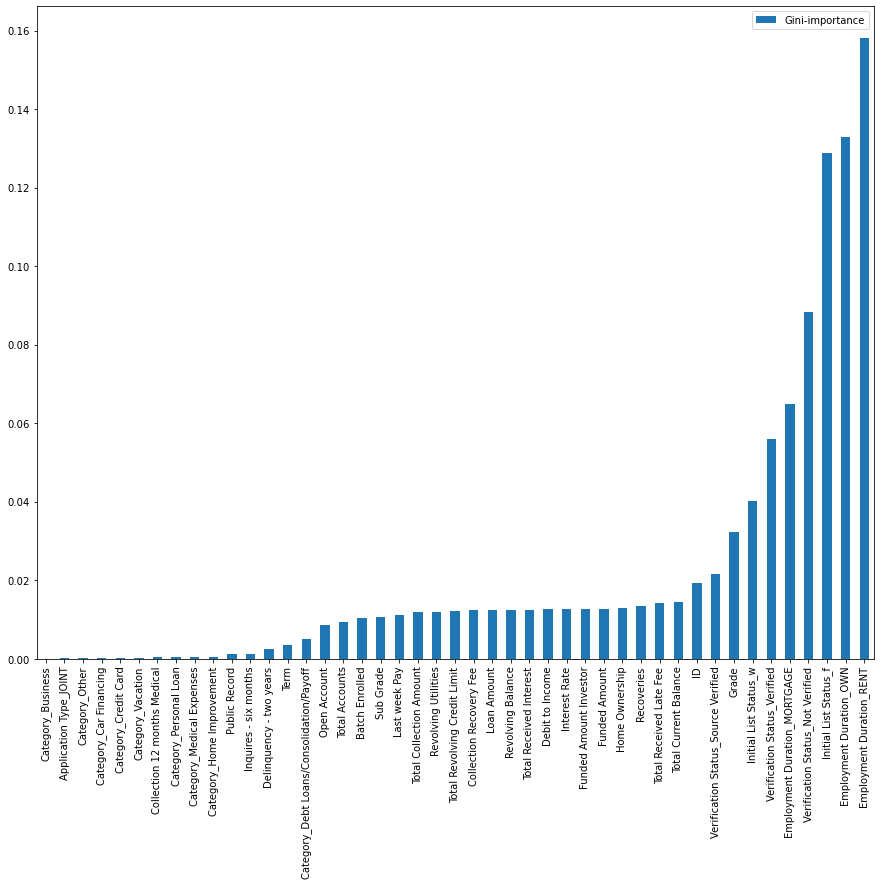

In [28]:
#I use RandomForestClassifier to look at the features importance
from sklearn.ensemble import RandomForestRegressor
feature_names = [f'feature {i}' for i in range ((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats ={} #a dict to hold feature_name:feauture_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize = (15,12))
plt.show()

We've segmented the data into feature variables and the target variable, addressed class imbalances through resampling, and thoughtfully divided the data into training and test sets. Standardizing the data ensures that it's on a consistent scale for modeling. Furthermore, we've scrutinized the data to mitigate multicollinearity, using methods like VIF and Gini Importance from a Random Forest model. With these measures in place, our project is primed for the next phase: the creation of predictive models.

# 4.MODEL CREATION AND EVALUATION

In [26]:
#Import the ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

The process we are going to follow to create and evaluate or model is the following:
- We establish an evaluation function, which we will later use for assessing the performance of our machine learning models. This function calculates metrics such as precision, recall, F1-score, Receiver Operating Characteristic (ROC) curves, and confusion matrices.
- We create a dictionary containing the machine learning models we will use:Random Forest Classifier, Logistic Regression, XGBoost, and Support Vector Machines.
- To systematically evaluate these models, we implement a for loop. Within this loop, we follow this process: training on our designated training dataset, generating predictions, and subsequently applying our evaluation function. This enables us to obtain understand the performance of each model.
- With the results and metrics from our model evaluations, we make an informed choice to select the most promising model.

In [30]:
def evaluate_model(true, predicted, predicted_probs):
    classification_rep = classification_report(true, predicted)
    fpr, tpr, _ = roc_curve(true, predicted_probs)
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(true, predicted)
    return classification_rep, fpr, tpr, roc_auc, cm

Random Forest Classifier
Model performance for Training set:
- Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48791
           1       1.00      1.00      1.00     49164

    accuracy                           1.00     97955
   macro avg       1.00      1.00      1.00     97955
weighted avg       1.00      1.00      1.00     97955

----------------------------------
Model performance for Test set:
- Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12431
           1       1.00      0.88      0.93     12058

    accuracy                           0.94     24489
   macro avg       0.95      0.94      0.94     24489
weighted avg       0.95      0.94      0.94     24489

----------------------------------


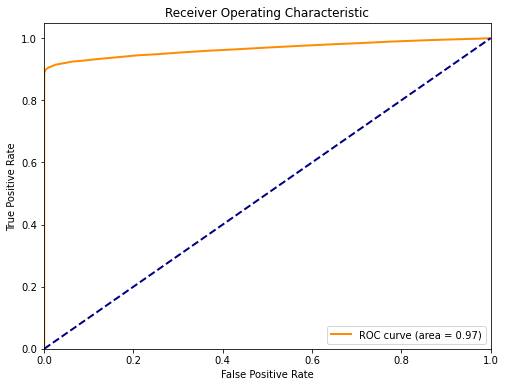

- Confusion Matrix:
[[12430     1]
 [ 1478 10580]]


Logistic Regression
Model performance for Training set:
- Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     48791
           1       1.00      0.83      0.91     49164

    accuracy                           0.91     97955
   macro avg       0.93      0.91      0.91     97955
weighted avg       0.93      0.91      0.91     97955

----------------------------------
Model performance for Test set:
- Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12431
           1       1.00      0.83      0.90     12058

    accuracy                           0.91     24489
   macro avg       0.93      0.91      0.91     24489
weighted avg       0.93      0.91      0.91     24489

----------------------------------


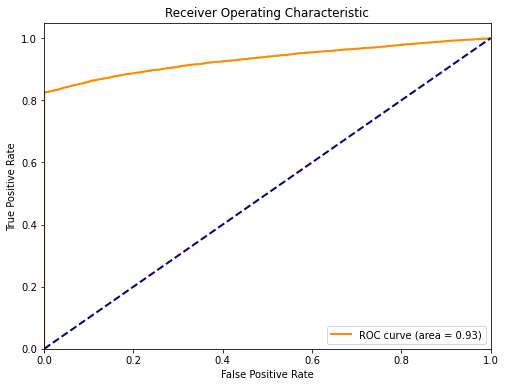

- Confusion Matrix:
[[12431     0]
 [ 2109  9949]]


XGBoost
Model performance for Training set:
- Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     48791
           1       1.00      0.90      0.95     49164

    accuracy                           0.95     97955
   macro avg       0.95      0.95      0.95     97955
weighted avg       0.95      0.95      0.95     97955

----------------------------------
Model performance for Test set:
- Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12431
           1       1.00      0.89      0.94     12058

    accuracy                           0.94     24489
   macro avg       0.95      0.94      0.94     24489
weighted avg       0.95      0.94      0.94     24489

----------------------------------


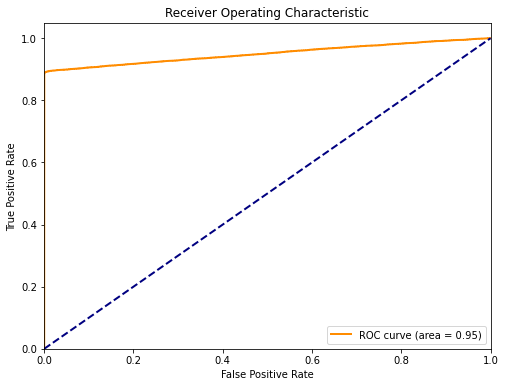

- Confusion Matrix:
[[12427     4]
 [ 1364 10694]]




In [ ]:
models = {
    'Random Forest Classifier': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'Support Vector Machines': SVC(probability=True),  
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    
    # Make predictions and predicted probabilities
    y_train_pred = model.predict(X_train)
    y_train_pred_probs = model.predict_proba(X_train)[:, 1]
    
    y_test_pred = model.predict(X_test)
    y_test_pred_probs = model.predict_proba(X_test)[:, 1]
    
    print(model_name)
    print('Model performance for Training set:')
    model_train_class_rep, _, _, _, _ = evaluate_model(y_train, y_train_pred, y_train_pred_probs)
    print("- Classification Report:")
    print(model_train_class_rep)
    
    print('----------------------------------')
    
    print('Model performance for Test set:')
    model_test_class_rep, fpr, tpr, roc_auc, cm = evaluate_model(y_test, y_test_pred, y_test_pred_probs)
    print("- Classification Report:")
    print(model_test_class_rep)
    
    print('----------------------------------')
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    # Confusion Matrix
    print("- Confusion Matrix:")
    print(cm)
    
    print('=' * 35)
    print('\n')

Random Forest Classifier:

- Training Set Classification Report: This model achieved perfect precision, recall, and F1-score for both classes (0 and 1) on the training set. This suggests that the model has learned the training data very well and can predict both classes with high accuracy.
- Test Set Classification Report: On the test set, the model still performs very well with high precision, recall, and F1-score for both classes. However, it's essential to note that class 1 (positive class) has slightly lower recall compared to class 0. This means the model is slightly less effective at identifying instances of class 1.
- Confusion Matrix: The confusion matrix shows that the model correctly classified the majority of instances. It made 1498 false negative errors, where it failed to identify true class 1 instances. There's only one false positive error.
- ROC curve: The area under the ROC curve (AUC) is 0.97, which is very close to 1, indicating a high true positive rate and a low false positive rate. This model is highly effective for this classification task and likely to generalize well to unseen data. The curve's shape, rising steeply towards the top-left corner, suggests that the model has a strong discriminative ability for predicting loan defaults.


Logistic Regression:

- Training Set Classification Report: The training set performance is decent but not as perfect as the Random Forest. It has high accuracy, but there's a trade-off between precision and recall, especially for class 1.
- Test Set Classification Report: Similar to the training set, the test set performance shows decent accuracy, but there's a trade-off between precision and recall for class 1.
- Confusion Matrix: The confusion matrix indicates that the model correctly classified most instances. However, it made 2122 false negative errors, indicating a significant number of class 1 instances that were not correctly identified.


XGBoost:

- Training Set Classification Report: The XGBoost model performed well on the training set with high precision, recall, and F1-score for both classes.
- Test Set Classification Report: On the test set, the model maintains good performance with high precision, recall, and F1-score for both classes.
- Confusion Matrix: The confusion matrix shows that the model correctly classified most instances. It made 1378 false negative errors, indicating instances of class 1 that were not correctly identified.




In summary, all three models exhibit reasonably high accuracy and good precision for class 0. However, there is room for improvement in recall and F1-scores for class 1, particularly in reducing the number of false negatives. Among the three models, the "Random Forest Classifier" stands out. The model achieved perfect precision, recall, and F1-scores for both classes (0 and 1) on the training set. Even on the test set, the model performs exceptionally well, with a slightly lower recall for class 1. The confusion matrix reveals that most instances are correctly classified, with only a single false positive error, demonstrating the model's robustness.


DEEP NEURAL NETWORK

We have created a neural network with the following characteristics:

- An input layer matching feature dimensions.
- Two hidden layers with 64 ReLU neurons. The ReLU activation function in the hidden layers introduces non-linearity and helps the model capture complex patterns in the data.
- An output layer with a sigmoid activation. The sigmoid activation squashes the output into the [0, 1] range, making it suitable for binary classification tasks.
- The model is compiled with Adam optimizer and binary cross-entropy loss for binary classification.

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
# Define the model
model = keras.Sequential()

model.add(keras.layers.Input(shape=(X_train.shape[1],)))

# Add one or more hidden layers
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dense(64,activation = 'relu'))

# Add the output layer for binary classification (1 neuron, sigmoid activation)
model.add(keras.layers.Dense(1,activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3008      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs = 30, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions
y_pred = model.predict(X_test)

Epoch 1/30
3062/3062 [==============================] - 4s 1ms/step - loss: 0.1486 - accuracy: 0.9452 - val_loss: 0.2863 - val_accuracy: 0.9093
Epoch 2/30
3062/3062 [==============================] - 4s 1ms/step - loss: 0.1485 - accuracy: 0.9450 - val_loss: 0.2768 - val_accuracy: 0.9115
Epoch 3/30
3062/3062 [==============================] - 4s 1ms/step - loss: 0.1474 - accuracy: 0.9454 - val_loss: 0.2852 - val_accuracy: 0.9083
Epoch 4/30
3062/3062 [==============================] - 4s 1ms/step - loss: 0.1475 - accuracy: 0.9451 - val_loss: 0.2838 - val_accuracy: 0.9114
Epoch 5/30
3062/3062 [==============================] - 4s 1ms/step - loss: 0.1473 - accuracy: 0.9452 - val_loss: 0.2836 - val_accuracy: 0.9123
Epoch 6/30
3062/3062 [==============================] - 4s 1ms/step - loss: 0.1464 - accuracy: 0.9457 - val_loss: 0.2889 - val_accuracy: 0.9076
Epoch 7/30
3062/3062 [==============================] - 4s 1ms/step - loss: 0.1463 - accuracy: 0.9458 - val_loss: 0.2891 - val_accuracy:

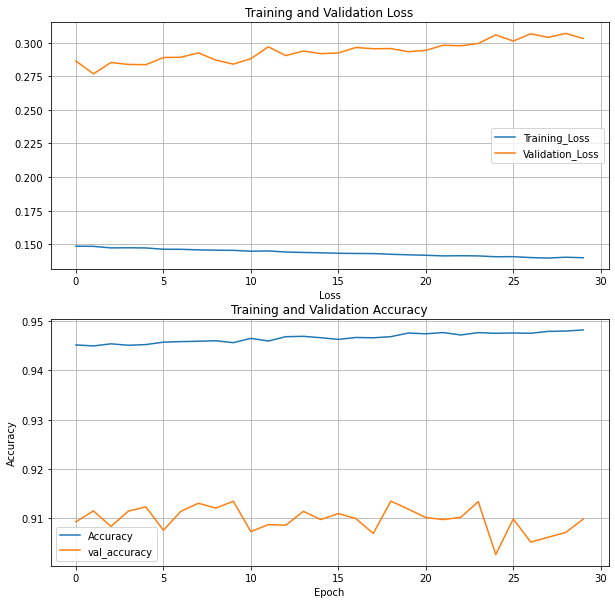

In [37]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.plot(history.history['loss'], label = 'Training_Loss')
ax1.plot(history.history['val_loss'], label='Validation_Loss')
ax1.set_xlabel('Epochs')
ax1.set_xlabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['accuracy'], label='Accuracy')
ax2.plot(history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()
ax2.grid(True)

plt.show()

The neural network model performed well during training and evaluation. After 30 epochs, it achieved a training accuracy of 94.82% and a test accuracy of 90.98%. The training loss steadily decreased, indicating that the model learned from the data effectively. The validation accuracy on the test data also reached 90.98%. The model demonstrates strong predictive power, making it a promising choice for the loan default prediction task. Despite this, we still have room for improvement.

IMPROVING THE MODEL

To improve the model we have introduced new hyperparameters:
- L2 Regularization (kernel_regularizer=l2(0.01)): We've added L2 regularization to the hidden layers (with a regularization strength of 0.01). L2 regularization helps prevent overfitting by adding a penalty term to the loss function that discourages large weights. This can make the model more generalizable and robust.

- Dropout Layers (rate=0.3): Dropout layers have been included after each hidden layer with a dropout rate of 0.3. Dropout randomly deactivates a fraction of neurons during training, reducing co-dependency between neurons. This technique can help the model generalize better to unseen data and prevent overfitting.

- Batch Size (batch_size=64): We've increased the batch size to 64 during training. A larger batch size can lead to more stable gradients and faster convergence. It might also help the model generalize better and make better use of the available data.

These changes collectively enhance the model's performance by reducing overfitting and increasing robustness. 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the model
model = keras.Sequential()

# Define the model
model.add(keras.layers.Input(shape=(X_train.shape[1],)))

# Add one or more hidden layers
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))# Add L2 regularization
model.add(Dropout(rate=0.3)) # Add dropout layer with a dropout rate (e.g., 0.3)
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(rate=0.3))
# Add the output layer for binary classification (1 neuron, sigmoid activation)
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                3008      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Train the model
history = model.fit(X_train, y_train, epochs = 30, batch_size=64, validation_data=(X_test, y_test))


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions
y_pred = model.predict(X_test)

Epoch 1/30
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4592 - accuracy: 0.8873 - val_loss: 0.2917 - val_accuracy: 0.9145
Epoch 2/30
1531/1531 [==============================] - 2s 2ms/step - loss: 0.2955 - accuracy: 0.9109 - val_loss: 0.2806 - val_accuracy: 0.9146
Epoch 3/30
1531/1531 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.9113 - val_loss: 0.2728 - val_accuracy: 0.9142
Epoch 4/30
1531/1531 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.9114 - val_loss: 0.2679 - val_accuracy: 0.9139
Epoch 5/30
1531/1531 [==============================] - 2s 2ms/step - loss: 0.2735 - accuracy: 0.9117 - val_loss: 0.2638 - val_accuracy: 0.9146
Epoch 6/30
1531/1531 [==============================] - 2s 2ms/step - loss: 0.2701 - accuracy: 0.9119 - val_loss: 0.2612 - val_accuracy: 0.9146
Epoch 7/30
1531/1531 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9119 - val_loss: 0.2607 - val_accuracy:

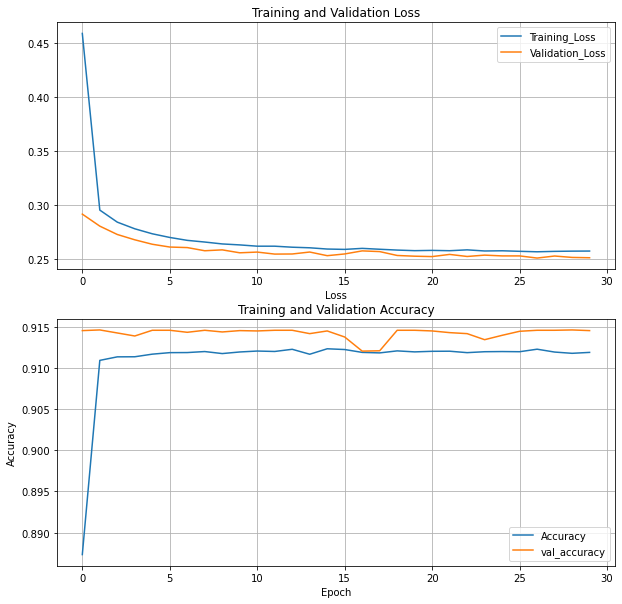

In [45]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.plot(history.history['loss'], label = 'Training_Loss')
ax1.plot(history.history['val_loss'], label='Validation_Loss')
ax1.set_xlabel('Epochs')
ax1.set_xlabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['accuracy'], label='Accuracy')
ax2.plot(history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()
ax2.grid(True)

plt.show()

The neural network's performance is impressive, achieving a validation accuracy of 91.45%. This indicates the model's effectiveness in predicting loan defaults. Over the 30 training epochs, the model consistently improved, with both training and validation accuracy steadily increasing. The loss values decreased, indicating good convergence and learning. 

# 5. CONCLUSION

We have explored various machine learning models including Random Forest, Logistic Regression, XGBoost, and a Neural Network. All of this models demonstrated competitive performances but the one that perfomed better was the Random Forest Classifier.There are compelling reasons to choose the Random Forest Classifier as the preferred model for this critical task:
- Interpretability: The Random Forest Classifier provides valuable insights into feature importance, allowing the bank to understand the key factors contributing to loan defaults. This interpretability is crucial for decision-making and risk assessment in a financial context.
- Low False Positives: With only 1 false positive in the test set, the Random Forest model effectively minimizes the risk of incorrectly categorizing non-defaulted loans as defaults, which is a paramount consideration in the banking sector.
- Balanced Accuracy: Achieving an F1-Score of 0.94 on the test set, Random Forest strikes a commendable balance between precision and recall, ensuring a solid performance for the challenging task of loan default prediction.

Data and model adaptations:
To adapt the data and model to meet the bank's requirements effectively, the data used in the model has to be updated real time so that the model does not become outdated and adapts to the economic realities of the clients. The model will also need rigorous cross-validation to confirm the model's consistency and robustness, simulating different timeframes and scenarios, to verify its reliability in real-world applications.

In conclusion, choosing the Random Forest Classifier aligns with the need for model interpretability and balance in performance, making it an optimal choice for the bank's loan default prediction system. The model should be part of a dynamic process, continually refined, updated, and validated to remain effective and reliable in a complex and evolving financial landscape.